# <h2 align="center"><font color = 'crimson'>Human Activity Recognition - EDA and Predictions</font></h2>

# <font color = 'darkolivegreen'>Introduction</font>

>The accurate measurement of daily activities performed by people has gathered attention for both the researchers and the gadget industries. This has given rise to the subject matter of __Human Activity Recognition (HAR)__. Recognizing the basic activities of human beings with the help of smartphone, smartwatch or wristband sensors can be beneficial for numerous real-life applications.

>Have you ever wondered how these above mentioned gadgets know how many steps you have taken today, how many hours you have slept or even when you are raising your hand? Well, your devices have multiple sensors that stores various informations. Such gadgets provide a wide spectrum of sensors that can be used with ease in day-to-day life with high performance and better accuracy. Since people are becoming more and more conscious about their health and fitness, exercise tracking and sleep tracking has become a fashionable trend for many health enthusiasts, who rely heavily on such devices and sensors for such purposes.

# <font color = 'darkolivegreen'>Description of the experiment</font>
>The Human Activity Recognition database was built from the recordings of 30 study participants within an age bracket of 19-48 years, performing activities of daily living while carrying a waist-mounted smartphone with embedded inertial sensors. Each person performed six activities __(WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING)__. Using its embedded accelerometer and gyroscope, the researcher captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The obtained dataset has been randomly partitioned into two sets, where 70% of the dataset was selected for generating the training data and 30% the test data. 

(Additional information: The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain).

### <font color = 'teal'>Loading the libraries</font>

In [1]:
import numpy as np
import pandas as pd

# For visualizations
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode()
import seaborn as sns

# To build models
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

### <font color = 'teal'>Exploring the data</font>

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.923527         -0.934724  ...                        -0.710304   
1         -0.957686         -0.943068  ...                        -0.861499   
2         -0.977469         -0.938692  ...                        -0.760104   
3         -0.989302         -0.938692  ...                        -0.482845   
4         -0.990441         -0.942469  ...                        -0.699205   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                    -0.112754                              0.030400   
1                     0.053477                             -0.007435   
2                    -0.118559                              0.177899   
3                    -0.036788                             -0.012892   
4                     0.123320                              0.122542   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.464761                             -0.018446   
1                         -0.732626                              0.703511   
2                          0.100699                              0.808529   
3                          0.640011                             -0.485366   
4                          0.693578                             -0.615971   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  \
0             -0.841247              0.179941             -0.058627        1   
1             -0.844788              0.180289             -0.054317        1   
2             -0.848933              0.180637             -0.049118        1   
3             -0.848649              0.181935             -0.047663        1   
4             -0.847865              0.185151             -0.043892        1   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING  

[5 rows x 563 columns]

In [4]:
trr = train.shape[0]
tsr = test.shape[0]

print('The train and test datasets consist of %d and %d rows respectively.'%(trr,tsr))

The train and test datasets consist of 7352 and 2947 rows respectively.


In [5]:
train['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

# <font color = 'darkolivegreen'>Discussion of the features</font>


>There are 563 individual features(columns). The features selected for this database come from the accelerometer and gyroscope 3-axial raw signals tAcc-XYZ . These time domain signals (prefix 't' to denote time) were captured at a constant rate of 50 Hz. Then they were filtered using a median filter and a 3rd order low pass Butterworth filter with a corner frequency of 20 Hz to remove noise.

>Similarly, the acceleration signal was then separated into body and gravity acceleration signals (tBodyAcc-XYZ and tGravityAcc-XYZ) using another low pass Butterworth filter with a corner frequency of 0.3 Hz.
Subsequently, the body linear acceleration and angular velocity were derived in time to obtain Jerk signals (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ) . Also the magnitude of these three-dimensional signals were calculated using the Euclidean norm (tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag, tBodyGyroJerkMag)

- jerk is the rate at which an object's acceleration changes with respect to time (calculated for BodyAcceleration readings).

- A Fast Fourier Transform (FFT) was applied to some of these signals producing fBodyAcc-XYZ, fBodyAccJerk-XYZ, fBodyGyro-XYZ, fBodyAccJerkMag, fBodyGyroMag, fBodyGyroJerkMag. (Note that the 'f' is to indicate frequency domain signals).

- These signals were used to estimate variables of the feature vector for each pattern:

( The '-XYZ' is used to denote 3-axial signals in the X, Y and Z directions)

- tBodyAcc-XYZ

- tGravityAcc-XYZ

- tBodyAccJerk-XYZ

- tBodyGyro-XYZ

- tBodyGyroJerk-XYZ

- tBodyAccMag

- tGravityAccMag

- tBodyAccJerkMag

- tBodyGyroMag

- tBodyGyroJerkMag

- fBodyAcc-XYZ

- fBodyAccJerk-XYZ

- fBodyGyro-XYZ

- fBodyAccMag

- fBodyAccJerkMag

- fBodyGyroMag

- fBodyGyroJerkMag

### <font color ='teal'>Checking for duplicates and null values</font>

In [6]:
train.duplicated().any()

False

In [7]:
test.duplicated().any()

False

In [8]:
train.isnull().sum().any()

False

In [9]:
test.isnull().sum().any()

False

There are no missing or duplicated values.

## <font color = 'darkolivegreen'>Problem Statement</font>


__Given a new datapoint we have to predict the activity.__

### <font color = 'teal'>EDA of the train set</font>

In [10]:
# Plotting the activities

label_counts = train.Activity.value_counts()

# Get colors
n = label_counts.shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Create plot
data = go.Bar(x = label_counts.index,
              y = label_counts,
              marker = dict(color = colors))

layout = go.Layout(title = 'Smartphone Activity Label Distribution',
                   xaxis = dict(title = 'Activities'),
                   yaxis = dict(title = 'Count'))

fig = go.Figure(data=[data], layout=layout)
fig.update_layout(template='presentation',
                  bargap=0.4,
                  font=dict(size=10))


iplot(fig)

>Although there are fluctuations in the label counts, the labels are almost equally distributed. Assuming the participants had to walk the same number of stairs upwards as well as downwards and knowing the smartphones had a constant sampling rate, there should be the same amount of datapoints for walking upstairs and downstairs.

### <font color = 'teal'>Analyzing some features</font>

>Based on the common nature of activities, we can broadly put these activities into two categories: __Static__ and __Dynamic__.
Laying, Standing and Sitting come under Static activities, and Walking, Walking_upstairs and Walking_downstairs come under the dynamic activities.

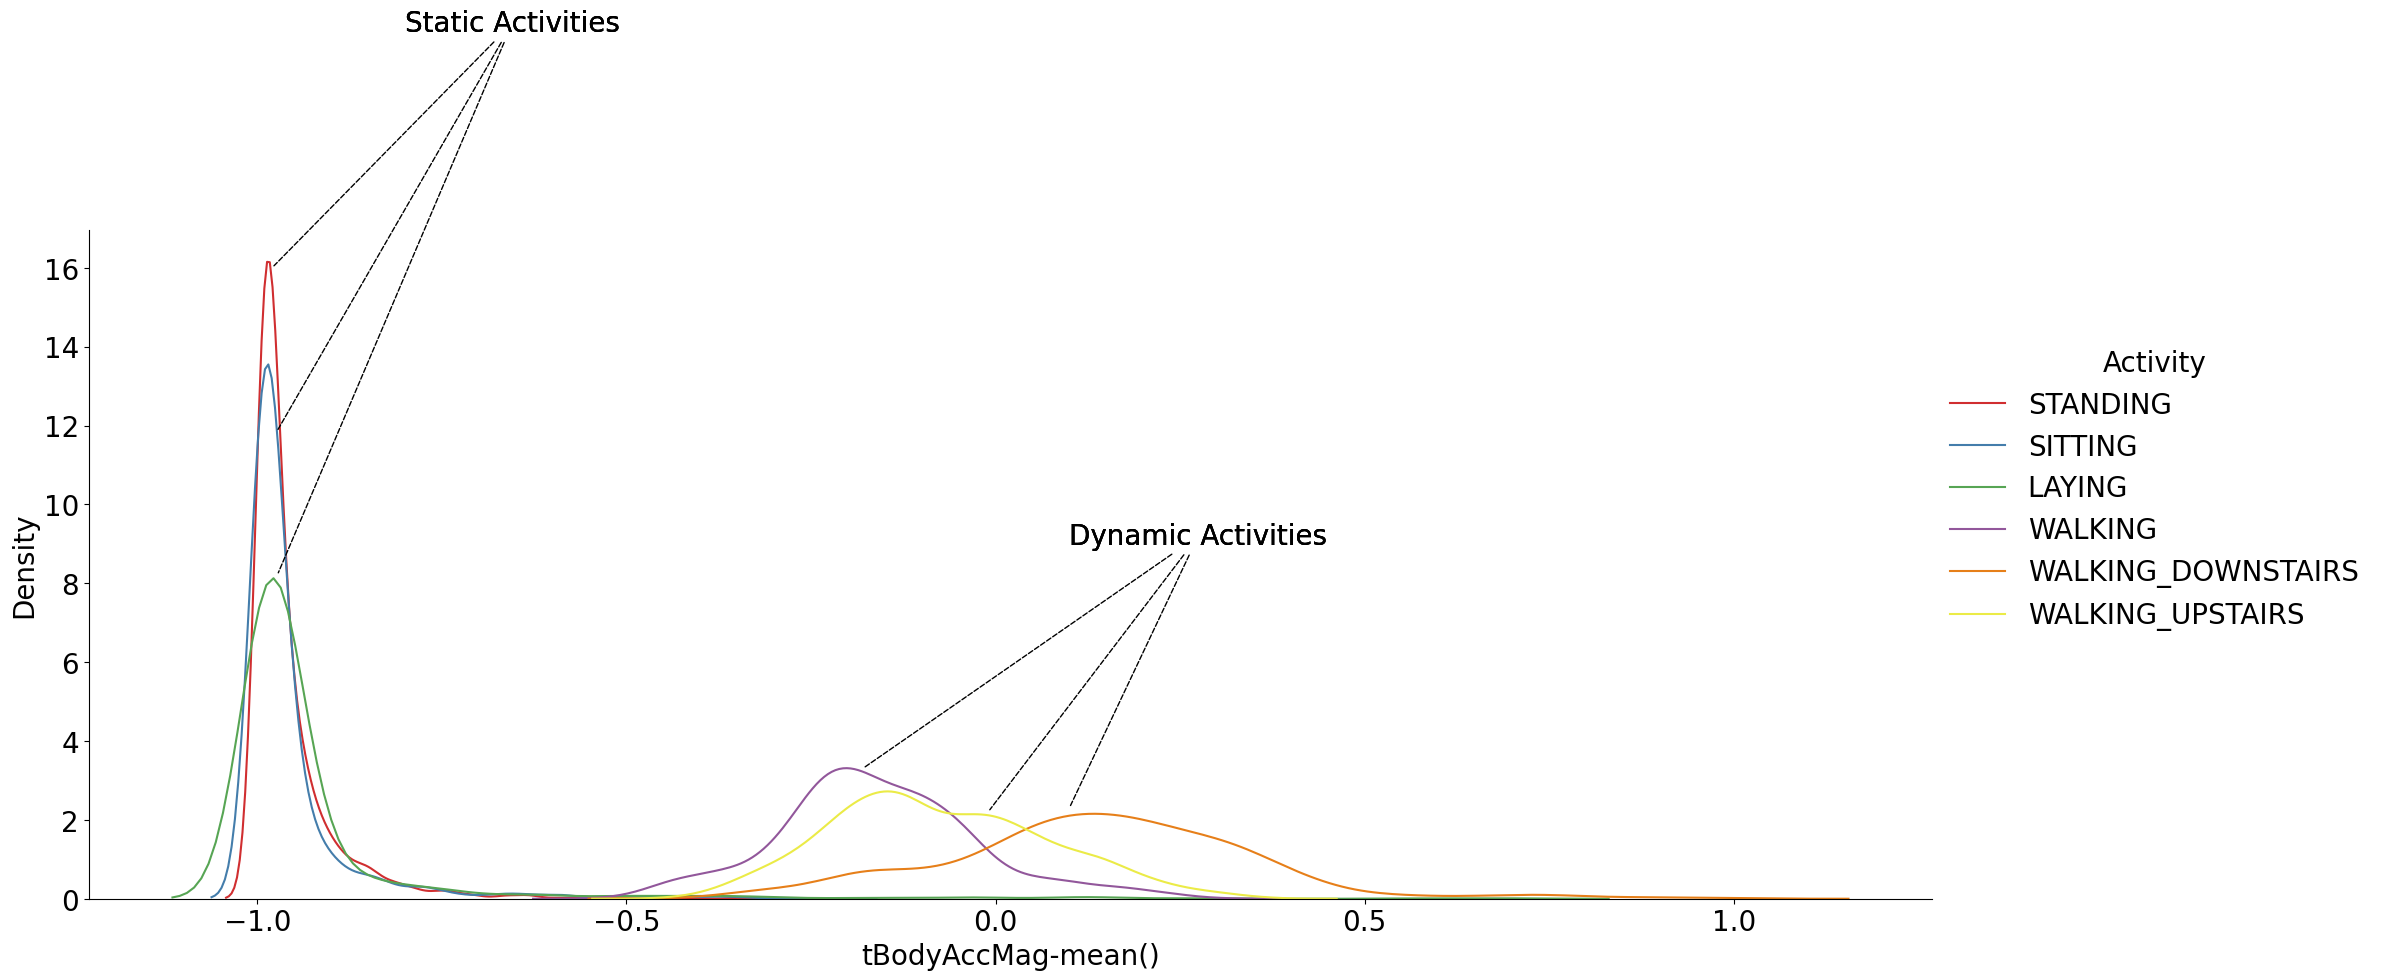

In [11]:
plt.rcParams['font.size'] = 20
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue = "Activity", height = 8, aspect = 2.5)
facetgrid.map(sns.distplot, 'tBodyAccMag-mean()', hist = False).add_legend()

plt.annotate("Static Activities", xy = (-.980, 16), xytext=(-0.8, 22), arrowprops = {'arrowstyle':'-','ls':'dashed'})
plt.annotate("Static Activities", xy=(-.975,11.8), xytext=(-0.8, 22),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy=(-.973,8.2), xytext=(-0.8, 22),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.18,3.3), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.01,2.2), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(0.1,2.3), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.show()

>Clearly, it can be observed from this graph that the 'tBodyAccMag-mean' or mean body acceleration magnitude being less than -0.5, all the activities are to be considered as Stationary activities.

 Let us have a closer look at this:

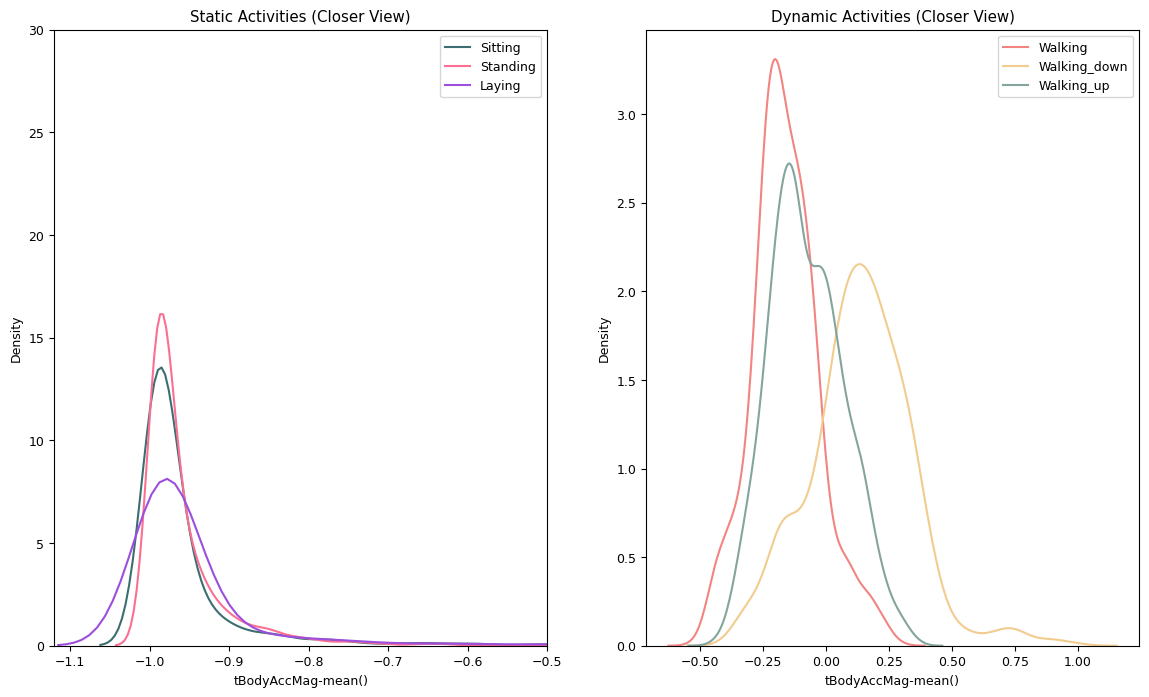

In [12]:
plt.figure(figsize = (14, 8))
plt.rcParams['font.size'] = 9
plt.subplot(1, 2, 1)
plt.title("Static Activities (Closer View)")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMag-mean()'],hist=False,label='Sitting',color='#3c6e71')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMag-mean()'],hist=False,label='Standing',color='#fb6f92')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMag-mean()'],hist=False,label='Laying',color='#9d4edd')
plt.axis([-1.12, -0.5, 0, 30])
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Dynamic Activities (Closer View)")
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMag-mean()'],hist=False,label='Walking',color='#f28482')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'],hist=False,label='Walking_down',color='#f2cc8f')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'],hist=False,label='Walking_up',color='#84a59d')
plt.legend()

### <font color = 'teal'>Position of Body-Acceleration-Components</font>

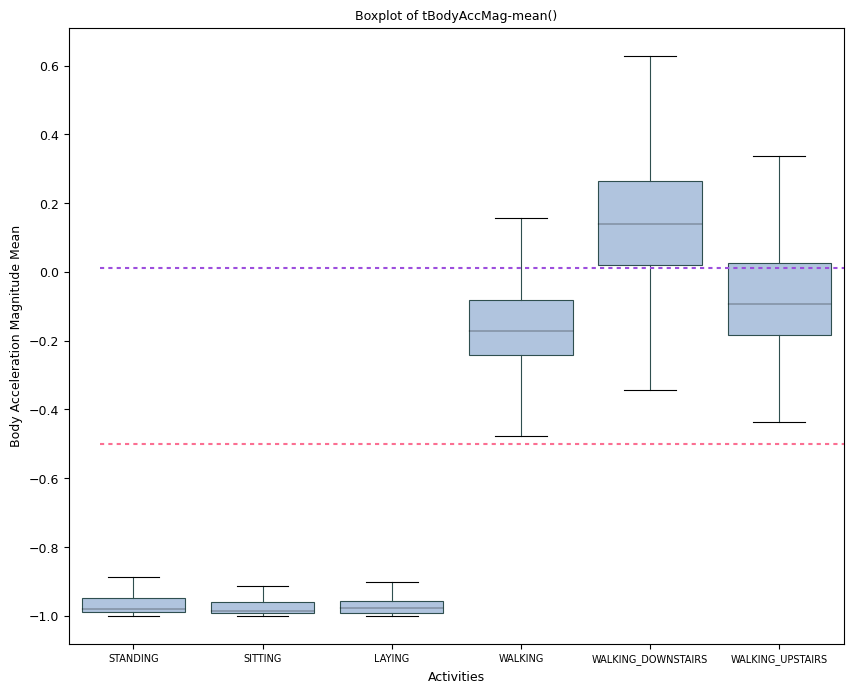

In [13]:
plt.figure(figsize = (10, 8))
boxprops = {'facecolor': 'lightsteelblue', 'edgecolor': 'darkslategrey', 'linewidth': 0.8}
whiskerprops = {'color': 'darkslategrey', 'linewidth': 0.8}
capprops = {'color': 'black', 'linewidth': 0.8}
medianprops = {'color': 'black', 'linewidth': 0.3}

sns.boxplot(x = "Activity", y = "tBodyAccMag-mean()", data = train,
            showfliers = False, 
            boxprops=boxprops, 
            whiskerprops=whiskerprops, 
            capprops=capprops, 
            medianprops=medianprops,
            )
plt.title("Boxplot of tBodyAccMag-mean()", fontsize = 9)
plt.axhline(y= -0.5, xmin = 0.04, dashes = (2,2), c='#fb6f92')
plt.axhline(y= 0.01, xmin = 0.04, dashes = (2,2), c='#9d4edd')
plt.xticks(rotation = 0, fontsize = 7)
plt.ylabel('Body Acceleration Magnitude Mean', fontsize = 9)
plt.xlabel('Activities', fontsize = 9)
plt.show()

#### Observations:
>- If tAccMean is less than -0.5 then the Activities are classified as either 'Standing', 'Sitting' or 'Laying'.
>- If tAccMean is greater than -0.5 then the Activities are classified as either 'Walking', 'Walking_Downstairs' or 'Walking_Upstairs'.
>- If tAccMean is greater than 0.01 then the Activity is classified as 'Walking_Downstairs'.

It should be noted that approximately 25% of the 'WALKING_DOWNSTAIRS' observations are below 0.01 level, meaning they are misclassified as other activities and therefore this condition makes an error of 25% in the classification.

### <font color = 'teal'>Position of Gravity-Acceleration-Components</font>
>Analysing the angles between x-axis and gravityMean feature and y-axis and gravityMean feature.

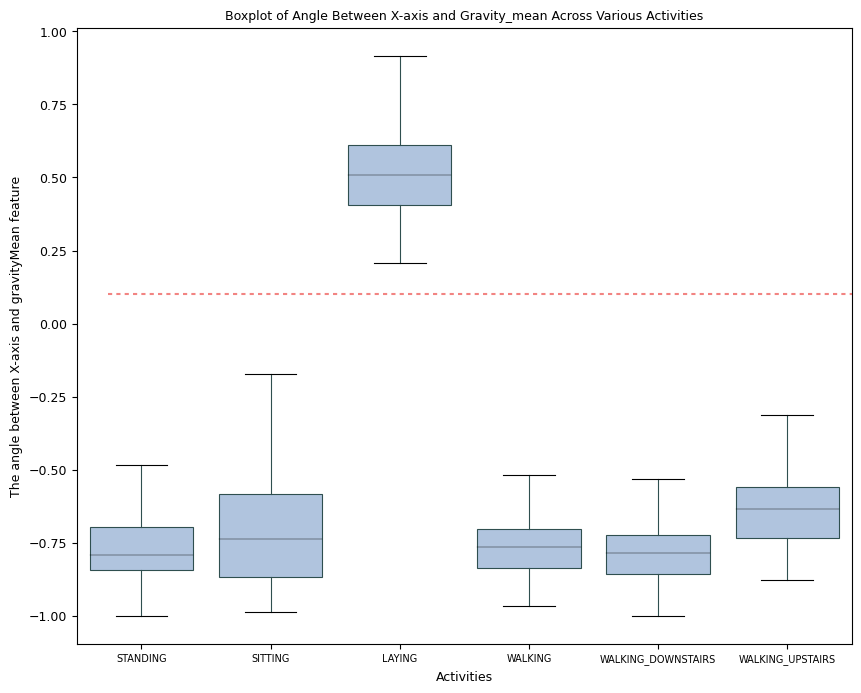

In [14]:
plt.figure(figsize = (10, 8))
boxprops = {'facecolor': 'lightsteelblue', 'edgecolor': 'darkslategrey', 'linewidth': 0.8}
whiskerprops = {'color': 'darkslategrey', 'linewidth': 0.8}
capprops = {'color': 'black', 'linewidth': 0.8}
medianprops = {'color': 'black', 'linewidth': 0.3}

sns.boxplot(x = "Activity", y = "angle(X,gravityMean)", data = train,
            showfliers = False, 
            boxprops=boxprops, 
            whiskerprops=whiskerprops, 
            capprops=capprops, 
            medianprops=medianprops,
            )
plt.title("Boxplot of Angle Between X-axis and Gravity_mean Across Various Activities", fontsize = 9)
plt.axhline(y= 0.1, xmin = 0.04, dashes = (2,2), c='#f28482')
plt.xticks(rotation = 0, fontsize = 7)
plt.ylabel('The angle between X-axis and gravityMean feature', fontsize = 9)
plt.xlabel('Activities', fontsize = 9)
plt.show()

#### Observations:
>If angle(X,gravityMean) value is greater than 0.1 level then the activities will be classified as 'Laying'. 

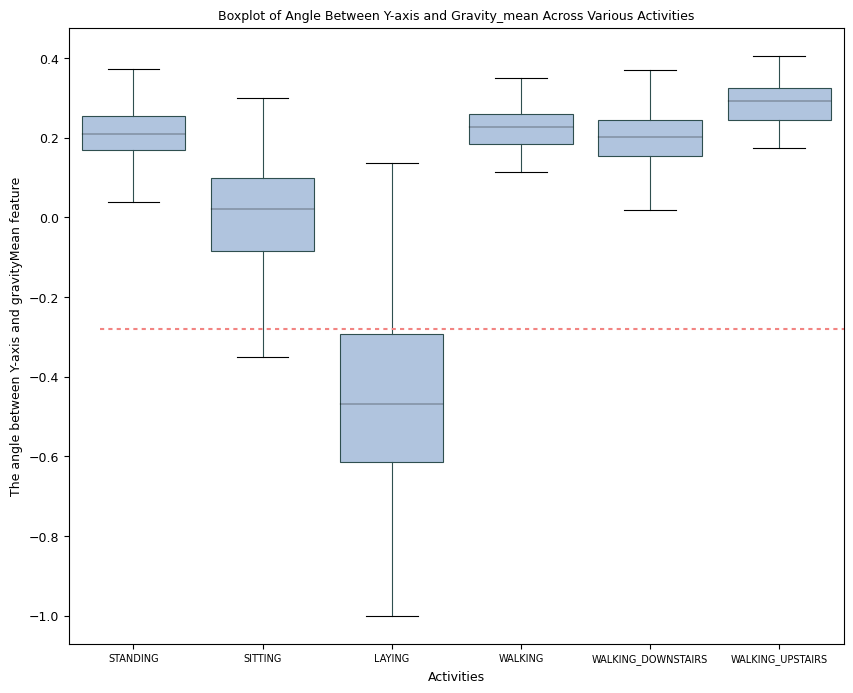

In [15]:
plt.figure(figsize = (10, 8))
boxprops = {'facecolor': 'lightsteelblue', 'edgecolor': 'darkslategrey', 'linewidth': 0.8}
whiskerprops = {'color': 'darkslategrey', 'linewidth': 0.8}
capprops = {'color': 'black', 'linewidth': 0.8}
medianprops = {'color': 'black', 'linewidth': 0.3}

sns.boxplot(x = "Activity", y = "angle(Y,gravityMean)", data = train,
            showfliers = False, 
            boxprops=boxprops, 
            whiskerprops=whiskerprops, 
            capprops=capprops, 
            medianprops=medianprops,
            )
plt.title("Boxplot of Angle Between Y-axis and Gravity_mean Across Various Activities", fontsize = 9)
plt.axhline(y= -0.28, xmin = 0.04, dashes = (2,2), c='#f28482')
plt.xticks(rotation = 0, fontsize = 7)
plt.ylabel('The angle between Y-axis and gravityMean feature', fontsize = 9)
plt.xlabel('Activities', fontsize = 9)
plt.show()

#### Observations:
>If angle(Y,gravityMean) is lower than -0.28 level then the activity is classifed as 'Laying'

It should be noted that approximately 25% observations are above the -0.28 level, meaning they are misclassified as other activities and therefore this condition makes an error of 25% in the classification.

### <font color = 'teal'>Visualizing the data using PCA</font>

>Principal component analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in the dimensionality reduction is to trade a little accuracy for simplicity since smaller data sets are easier to explore, analyze and visualize.

In [16]:
x_for_pca = train.drop(['subject', 'Activity'], axis =1)
pca = PCA(n_components = 2, random_state = 0).fit_transform(x_for_pca)

In [17]:
print('Shape before PCA was applied: ',x_for_pca.shape)
print('Shape after PCA was applied: ',pca.shape)

Shape before PCA was applied:  (7352, 561)
Shape after PCA was applied:  (7352, 2)


>Basically the observations of correlated features are converted into the set of linearly uncorrelated features with the help of orthogonal transformation. These new transformed features are called the __Principal Components__.


>It can be observed that 561 parameters have been reduced to only 2 parameters. It is extremely important to rescale the variables so that they have a comparable scale. If the input dimension is too high, then using PCA to speed up the learning algorithm can be a reasonable choice. After dimensionality reduction, usually there isn't any particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

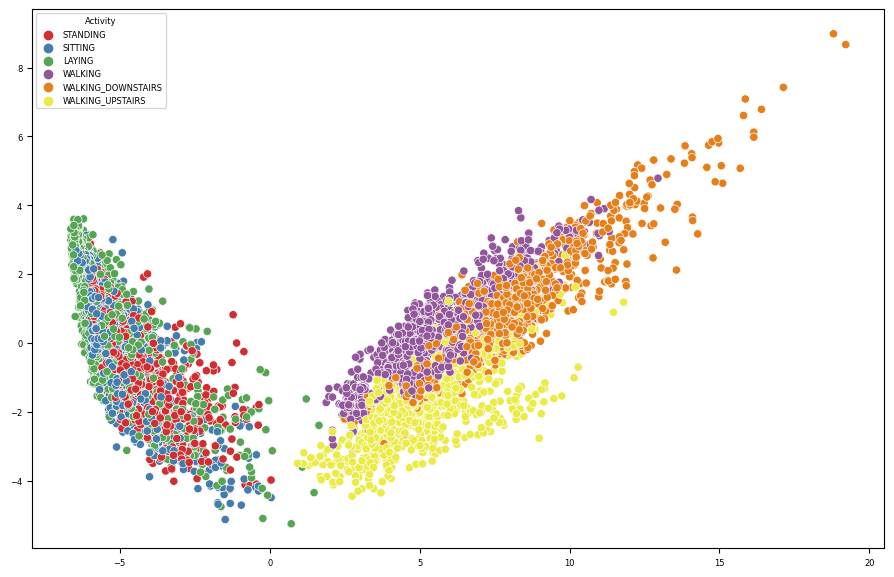

In [18]:
# Plotting
plt.figure(figsize = (11, 7))
plt.rcParams['font.size'] = 6
sns.scatterplot(x = pca[:,0], y= pca[:, 1], hue = train["Activity"])
plt.show()

The stationary and dynamic activities are easily separable.

### <font color = 'teal'>Visualizing the data using t-SNE</font>

>Another method for exploring and visualizing high-dimensional data is the __t- Distributed Stochastic Neighbor Embedding (t-SNE)__ technique. The t-SNE algorithm calculates a similarity measure between pairs of instances in the high dimensional space and in the low dimensional space. It then tries to optimize these two similarity measures using a cost function.

>t-SNE differs from PCA by preserving only small pairwise distances or local similarities whereas PCA is concerned with preserving large pairwise distances to maximize variance.

>The __perplexity__ parameter in t-SNE sets the effective number of neighbours that each point is attracted to. In t-SNE optimisation, all pairs of points are repulsed from each other, but only a small number of pairs feel attractive forces. So if the perplexity is very small, there will be fewer pairs that feel any attraction and the resulting embedding will tend to be 'fluffy', i.e. repulsive forces will dominate and will inflate the whole embedding to a bubble-like round shape. On the other hand, larger the perplexity, the more non-local information will be retained in the dimensionality reduction result and the clusters will tend to shrink into denser structures.

In [19]:
from sklearn.manifold import TSNE

# Performing t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iters=1000):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iters))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for the t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        plt.rcParams['font.size'] = 7.5
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, legend = True,
                   palette="Spectral", scatter_kws={'s': 1.4}, markers= 'o')
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iters))
        plt.show()
        print('Done!')


performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.016s...
[t-SNE] Computed neighbors for 7352 samples in 0.675s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.071s
[t-SNE] Iteration 50: error = 97.9001236, gradient norm = 0.0346002 (50 iterations in 0.968s)
[t-SNE] Iteration 100: error = 88.9300537, gradient norm = 0.0111773 (50 iterations in 

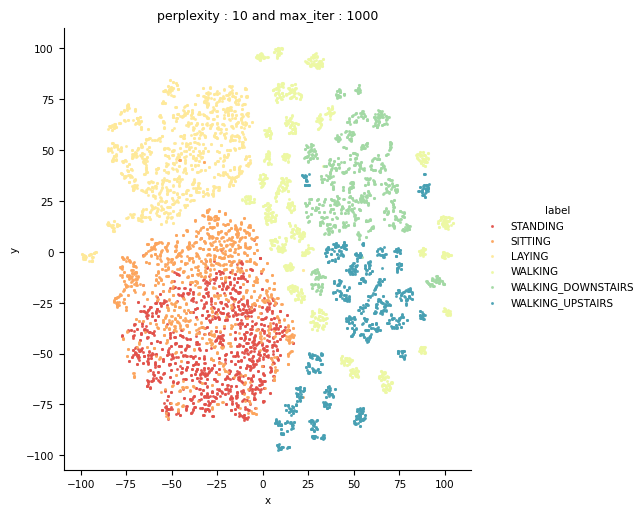

Done!

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.016s...
[t-SNE] Computed neighbors for 7352 samples in 0.803s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.217s
[t-SNE] Iteration 50: error = 78.8780823, gradient norm = 0.0246857 (50 iterations in 1.590s)
[t-SNE] Iteration 100: error = 75.2905426, gradient norm = 0.0053664 (50 iterati

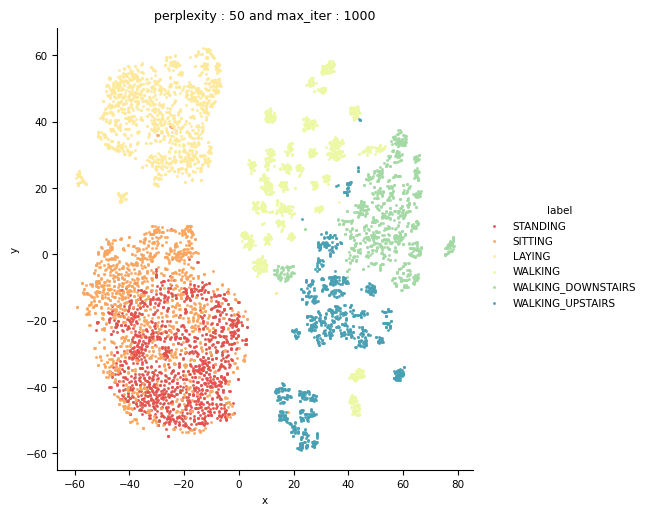

Done!

performing tsne with perplexity 90 and with 1000 iterations at max
[t-SNE] Computing 271 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.014s...
[t-SNE] Computed neighbors for 7352 samples in 0.821s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.540174
[t-SNE] Computed conditional probabilities in 0.366s
[t-SNE] Iteration 50: error = 72.1929779, gradient norm = 0.0244748 (50 iterations in 2.165s)
[t-SNE] Iteration 100: error = 69.4680862, gradient norm = 0.0044754 (50 iterati

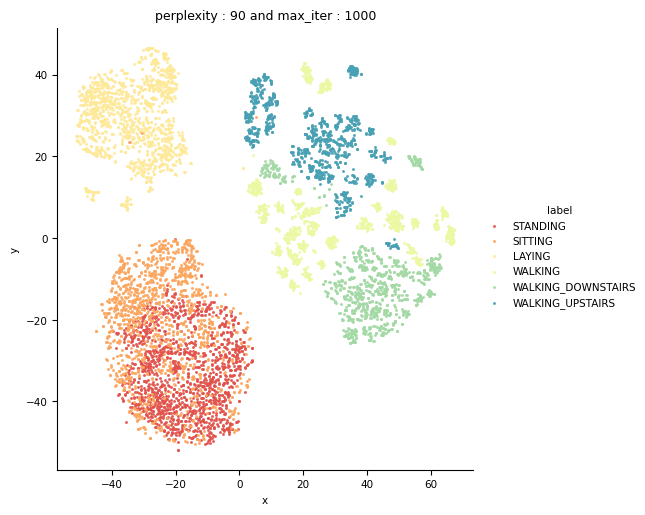

Done!


In [20]:
X_pre_tsne = train.drop(['subject', 'Activity'], axis=1)
y_pre_tsne = train['Activity']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[10,50,90])

#### Observations:

>As we can see the 'Laying' feature can be easily separated from the other features. The dynamic activities can also be separated from each other but with a lesser accuracy. The model will probably be confused between 'Standing' and 'Sitting'.

## <font color = 'darkolivegreen'>Preparing the ML models</font>

In [21]:
y_train = train.Activity
x_train = train.drop(['subject', 'Activity'], axis = 1)
y_test = test.Activity
x_test = test.drop(['subject', 'Activity'], axis = 1)

In [22]:
x_train.shape

(7352, 561)

In [23]:
x_test.shape

(2947, 561)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### <font color = 'teal'>Logistic Regression model with Hyperparameter tuning and cross validation</font>

>__RandomizedSearchCV__ is useful when the number of parameters in the dataset to be considered is particularly high, the magnitudes of influence are imbalanced and the training time is very long.

>__Cross validation__ is a technique that provides a more realistic estimate of the model’s generalization performance, i.e., its ability to perform well on the new, unseen data.  It involves repeatedly dividing the available data into multiple folds or subsets, using one of these folds as a validation set, and training the model on the remaining folds.

In [25]:
parameters = {'max_iter':[100, 200, 300, 400, 500, 600]}
classifierLR = LogisticRegression()
classifierLR_rs = RandomizedSearchCV(classifierLR, param_distributions = parameters, cv = 6, random_state = 0)
classifierLR_rs.fit(x_train, y_train)
y_predicted = classifierLR_rs.predict(x_test)

In [26]:
def get_best_est(model):
    print("Best estimator : ", model.best_estimator_)

get_best_est(classifierLR_rs)

Best estimator :  LogisticRegression(max_iter=300)


In [27]:
accuracyLR = round(accuracy_score(y_test, y_predicted),4)
print("Model Accuracy: ", accuracyLR)

Model Accuracy:  0.9617


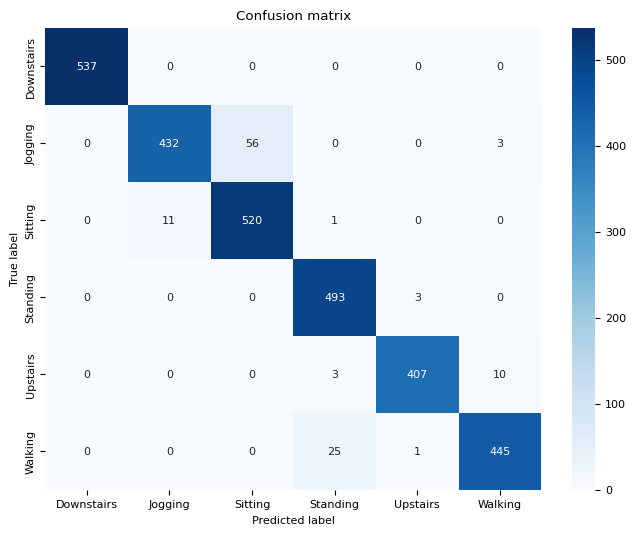

In [28]:
# Plotting a confusion matrix

from sklearn import metrics

LABELS = ['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']
confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = 8
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, cmap='Blues', fmt='d');
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [29]:
classification_report = metrics.classification_report(y_test, y_predicted)
print(classification_report)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.88      0.93       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.94      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.97      0.98       420
  WALKING_UPSTAIRS       0.97      0.94      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



#### <font color = 'steelblue'>We get a model accuracy of 96% using Logistic Regression.</font>

### <font color = 'teal'>Linear SVM model with Hyperparameter tuning and cross validation</font>

In [30]:
from sklearn.svm import LinearSVC

parameters = {'max_iter':[100, 200, 300, 400, 500, 600]}
classifierSVM = LinearSVC()
classifierSVM_rs = RandomizedSearchCV(classifierSVM, param_distributions = parameters, cv = 6, random_state = 0)
classifierSVM_rs.fit(x_train, y_train)
y_predicted = classifierSVM_rs.predict(x_test)

In [31]:
accuracySVM = round(accuracy_score(y_test, y_predicted),4)
print("Model Accuracy: ", accuracySVM)

Model Accuracy:  0.9678


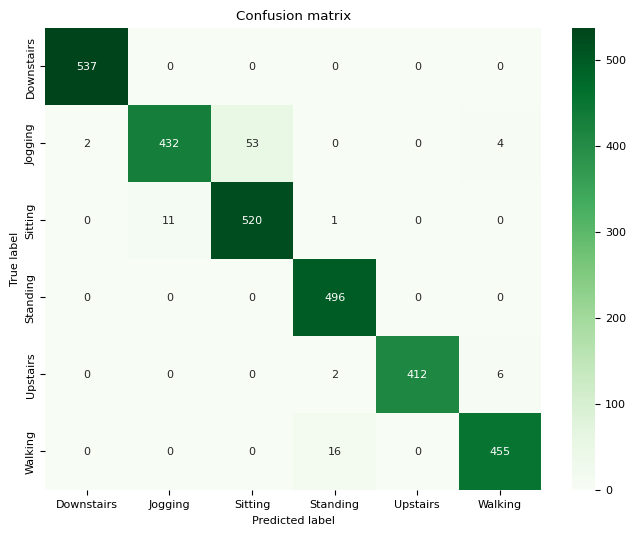

In [32]:
# Plotting a confusion matrix

from sklearn import metrics

LABELS = ['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']
confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = 8
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, cmap='Greens', fmt='d');
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [33]:
classification_report = metrics.classification_report(y_test, y_predicted)
print(classification_report)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.88      0.93       491
          STANDING       0.91      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.97      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



#### <font color = 'green'>This time as well, we get a model accuracy of 96% using SVM.</font>

## <font color = 'darkolivegreen'>Conclusion: </font>

>Both the classification algorithms return 96% model accuracy with significantly high F1 scores for individual 'Activity' parameters and hence the models will be well-described.

#### Project done by Pratiek Sarkar